In [ ]:

import matplotlib.pyplot as plt
import networkx as nx
from networkx.algorithms import bipartite
import pandas as pd
from IPython.display import display_html
from networkx.algorithms import community

#helper function
def display_side_by_side(dfs, titles=None):
    html_str = "<div style='display:flex;flex-flow:row nowrap;column-gap:20px'>"
    for df, title in zip(dfs, titles):
        html_str += f"""
        <div style="margin:10px">
            <h4 style="text-align:center">{title}</h4>
            {df.to_html()}
        </div>"""
    html_str += "</div>"

    display_html(html_str, raw=True)

def top_n_degrees(degree_dict: dict, n: int) -> pd.DataFrame:
    df = pd.DataFrame(list(degree_dict.items()), columns=["Node", "Degree"])
    df["Degree_(%)"] = (df["Degree"] / df["Degree"].sum()) * 100


    df = df.sort_values(by="Degree", ascending=False).reset_index(drop=True)
    return df.style.hide(axis="index")



# Davis Club

Davis Southern Club Women

Shows how to make unipartite projections of the graph and compute the
properties of those graphs.

These data were collected by Davis et al. in the 1930s.
They represent observed attendance at 14 social events by 18 Southern women.
The graph is bipartite (clubs, women).


In [447]:


G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]


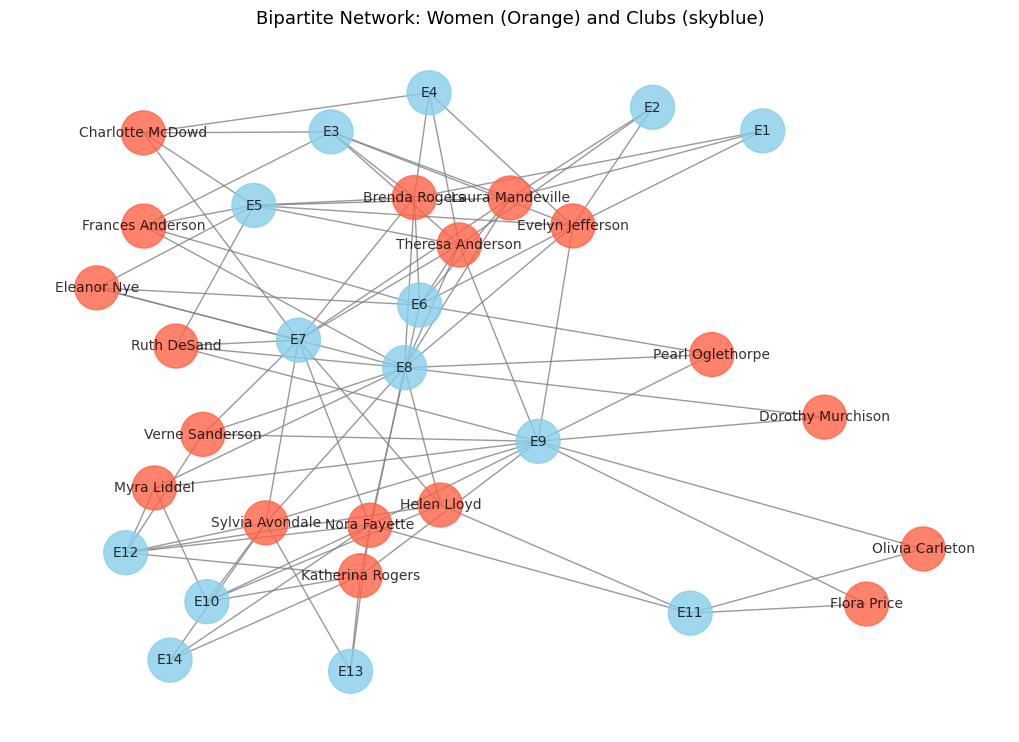

In [ ]:
for node in G.nodes():
    G.nodes[node]["color"] = "tomato" if node in women else "skyblue"

colors = [G.nodes[n]["color"] for n in G.nodes()]

pos = nx.spring_layout(G, seed=55)

plt.figure(figsize=(10, 7))
nx.draw(G, pos, with_labels=True, node_color=colors, node_size=1000, font_size=10, edge_color="gray", alpha=0.8)
plt.title("Bipartite Network: Women (Orange) and Clubs (skyblue)", fontsize=13)
plt.show()

## Women

In [449]:

WW = bipartite.weighted_projected_graph(G, women)


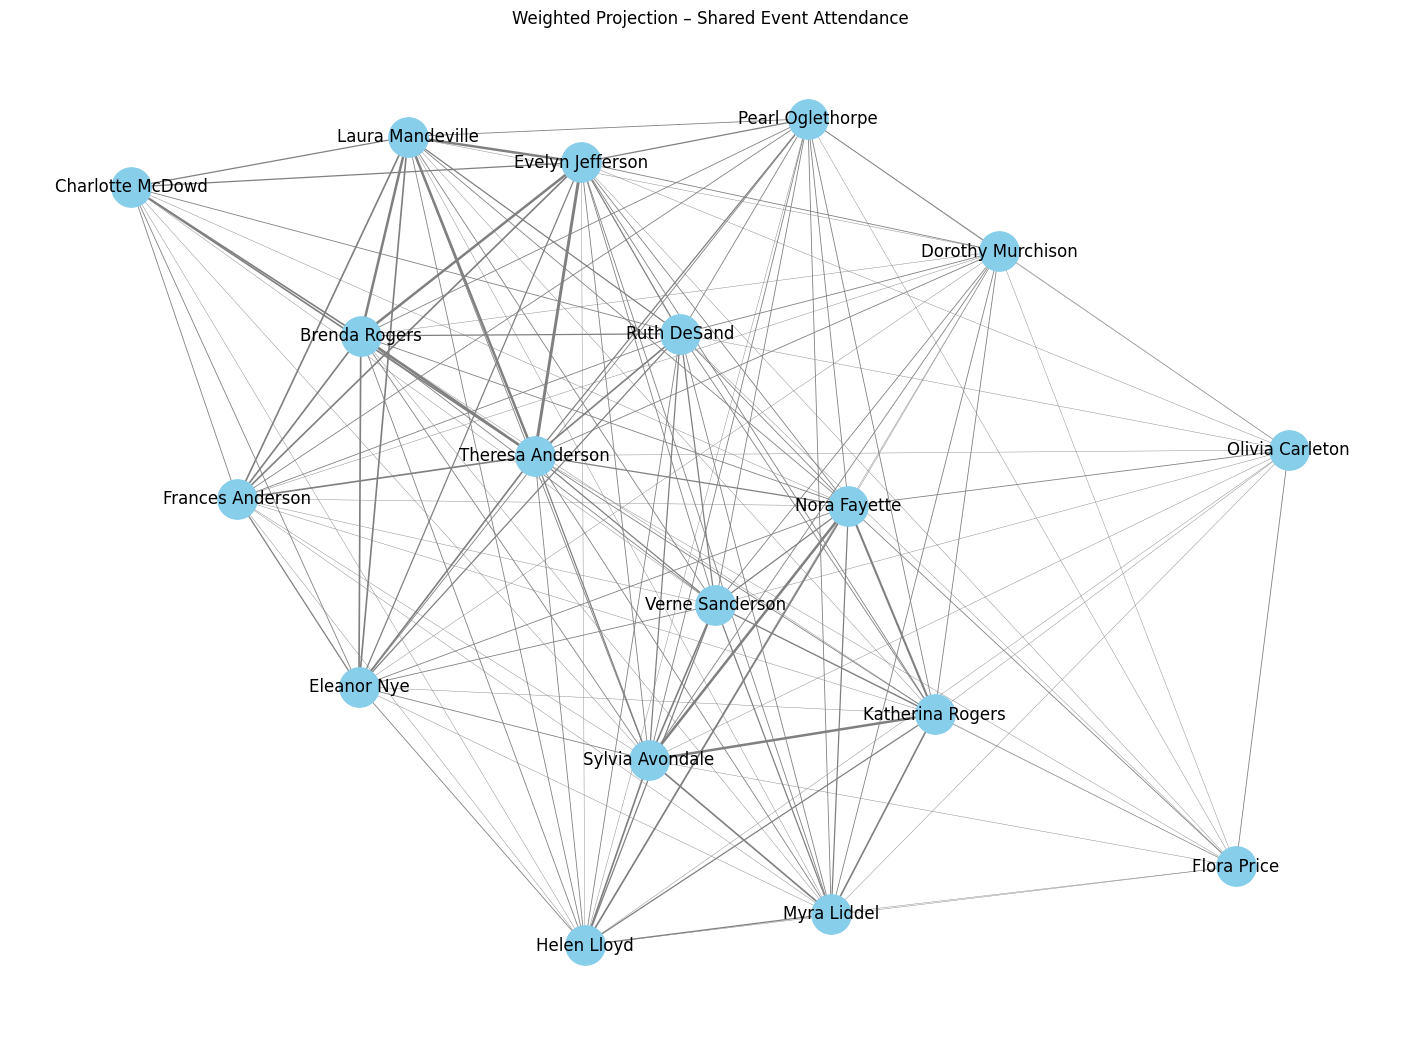

In [450]:
plt.figure(figsize=(14,10))

pos = nx.spring_layout(WW, seed=42)
edges, weights = zip(*nx.get_edge_attributes(WW, "weight").items())
nx.draw(WW, pos, with_labels=True, node_color="skyblue",
        node_size=800, width=[w*0.3 for w in weights], edge_color="gray")
plt.title("Weighted Projection – Shared Event Attendance")
plt.show()

In [453]:
for u, v, d in WW.edges(data=True):
    d['inv_weight'] = 1 / d['weight']


In [454]:


avg_clustering = nx.average_clustering(WW)
avg__weighted_clustering = nx.average_clustering(WW,weight="inv_weight")
w_density = nx.density(WW)


clusting_m = pd.DataFrame(data=[[avg_clustering,avg__weighted_clustering,w_density]], columns=["Average Clustering", "Weighted Average Clustering","Density"])
clusting_m.style.hide(axis="index")

Average Clustering,Weighted Average Clustering,Density
0.936687,0.493568,0.908497


The results show that the network is very cohesive overall, with an average clustering coefficient of 0.94, meaning that if two women share a connection with a third, they are very likely connected to each other as well. However, when the strength of connections is considered, the weighted clustering coefficient drops to 0.49, showing that many of these ties are not equally strong and that only some women attend multiple events together frequently. The network’s density of 0.91 confirms that most women are connected through at least one shared event, forming a highly linked social environment. Overall, the network appears broadly interconnected but with stronger and more consistent relationships concentrated among a smaller core of participants.

In [455]:
w_uwt_degree = dict(WW.degree())
w_uwt_degree_cent = nx.degree_centrality(WW)
w_uwt_betweenness = nx.betweenness_centrality(WW)
w_uwt_eigen = nx.eigenvector_centrality(WW)


w_uwt_degree_df = top_n_degrees(w_uwt_degree, 10)
w_uwt_degree_cent_df = top_n_degrees(w_uwt_degree_cent, 10)
w_uwt_betweenness_df = top_n_degrees(w_uwt_betweenness, 10)
w_uwt_eigen_df = top_n_degrees(w_uwt_eigen, 10)


display_side_by_side(
    [w_uwt_degree_df,w_uwt_degree_cent_df ,w_uwt_betweenness_df,w_uwt_eigen_df],
    ["Degree","Degree Centrality", "Betweeness Centrality","Eigen Centrality"]
)

Node,Degree,Degree_(%)
Evelyn Jefferson,17,6.115108
Theresa Anderson,17,6.115108
Sylvia Avondale,17,6.115108
Verne Sanderson,17,6.115108
Ruth DeSand,17,6.115108
Nora Fayette,17,6.115108
Helen Lloyd,17,6.115108
Myra Liddel,16,5.755396
Katherina Rogers,16,5.755396
Pearl Oglethorpe,16,5.755396



The degree and degree centrality results indicate that several women maintain a very active role within the network. Participants such as **Evelyn Jefferson**, **Theresa Anderson**, **Sylvia Avondale**, and **Ruth DeSand** show the highest values on both measures, meaning they are directly connected to almost every other member. Others, including **Myra Liddel**, **Katherina Rogers**, and **Laura Mandeville**, also display strong connectivity but with slightly fewer links. A few members, such as **Olivia Carleton**, **Flora Price**, and **Charlotte McDowd**, have lower scores, suggesting more limited participation and fewer direct relationships.  

The betweenness and eigenvector centrality results further confirm a well-connected structure, with only moderate differences among participants. Several women, including **Evelyn Jefferson**, **Theresa Anderson**, and **Nora Fayette**, share the same top betweenness value, indicating that many members play a similar role in linking different parts of the network rather than a single person dominating that position. Eigenvector centrality values also vary little, suggesting that influence is broadly distributed across the network. Since these findings are based on unweighted data, they reflect structural connectivity without considering the strength or frequency of interactions. Exploring the weighted versions of these metrics could provide a clearer picture of who maintains stronger or more consistent ties and how those patterns contribute to the network’s cohesion.


In [456]:
w_wt_degree = dict(WW.degree(weight="inv_weight"))
w_wt_betweenness = nx.betweenness_centrality(WW,weight="inv_weight")
w_wt_eigen = nx.eigenvector_centrality(WW,weight="inv_weight")


w_degree_top = top_n_degrees(w_wt_degree, 10)

# degree_centrality_top = top_n_degrees(degree_centrality, 10)
betweeness_centrality_top = top_n_degrees(w_wt_betweenness, 10)
eigen_top = top_n_degrees(w_wt_eigen, 10)


display_side_by_side(
    [w_degree_top,betweeness_centrality_top,eigen_top],
    ["Weighted Degree Centrality","Weighted Betweeness Centrality","Weighted Eigen Centrality"]
)

Node,Degree,Degree_(%)
Dorothy Murchison,12.000000,7.398925
Olivia Carleton,11.000000,6.782348
Flora Price,11.000000,6.782348
Helen Lloyd,11.000000,6.782348
Myra Liddel,10.000000,6.165771
Frances Anderson,9.833333,6.063008
Katherina Rogers,9.783333,6.032179
Verne Sanderson,9.250000,5.703338
Pearl Oglethorpe,9.166667,5.651957
Sylvia Avondale,8.750000,5.395050


When connection strength is taken into account, the overall pattern of relationships remains largely the same as in the unweighted analysis, indicating that the network’s structure is stable even when differences in tie intensity are considered. The weighted degree and eigenvector centrality values show similar rankings to the unweighted results, suggesting that the same women continue to occupy the most connected and influential positions. The betweenness centrality results, however, provide new insight by revealing which participants act as stronger intermediaries. **Theresa Anderson** and **Nora Fayette** hold the highest values, suggesting that they often lie on the shortest paths connecting otherwise separate groups and help bridge different parts of the network. **Sylvia Avondale** and **Evelyn Jefferson** follow, with modest but notable levels of intermediation. Most other members, including those with zero betweenness, participate mainly within their immediate circles and do not play major bridging roles. 

In [508]:
communities = community.greedy_modularity_communities(WW, weight="inv_weight")

community_data = []
for i, c in enumerate(communities, start=1):
    community_data.append({
        "Group": f"Group {i}",
        "Members": ", ".join(sorted(c)),
        "Size": len(c)
    })

community_df = pd.DataFrame(community_data)

community_df.style.hide(axis="index")

Group,Members,Size
Group 1,"Evelyn Jefferson, Flora Price, Helen Lloyd, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Theresa Anderson",7
Group 2,"Brenda Rogers, Dorothy Murchison, Eleanor Nye, Katherina Rogers, Laura Mandeville, Myra Liddel",6
Group 3,"Charlotte McDowd, Frances Anderson, Nora Fayette, Sylvia Avondale, Verne Sanderson",5


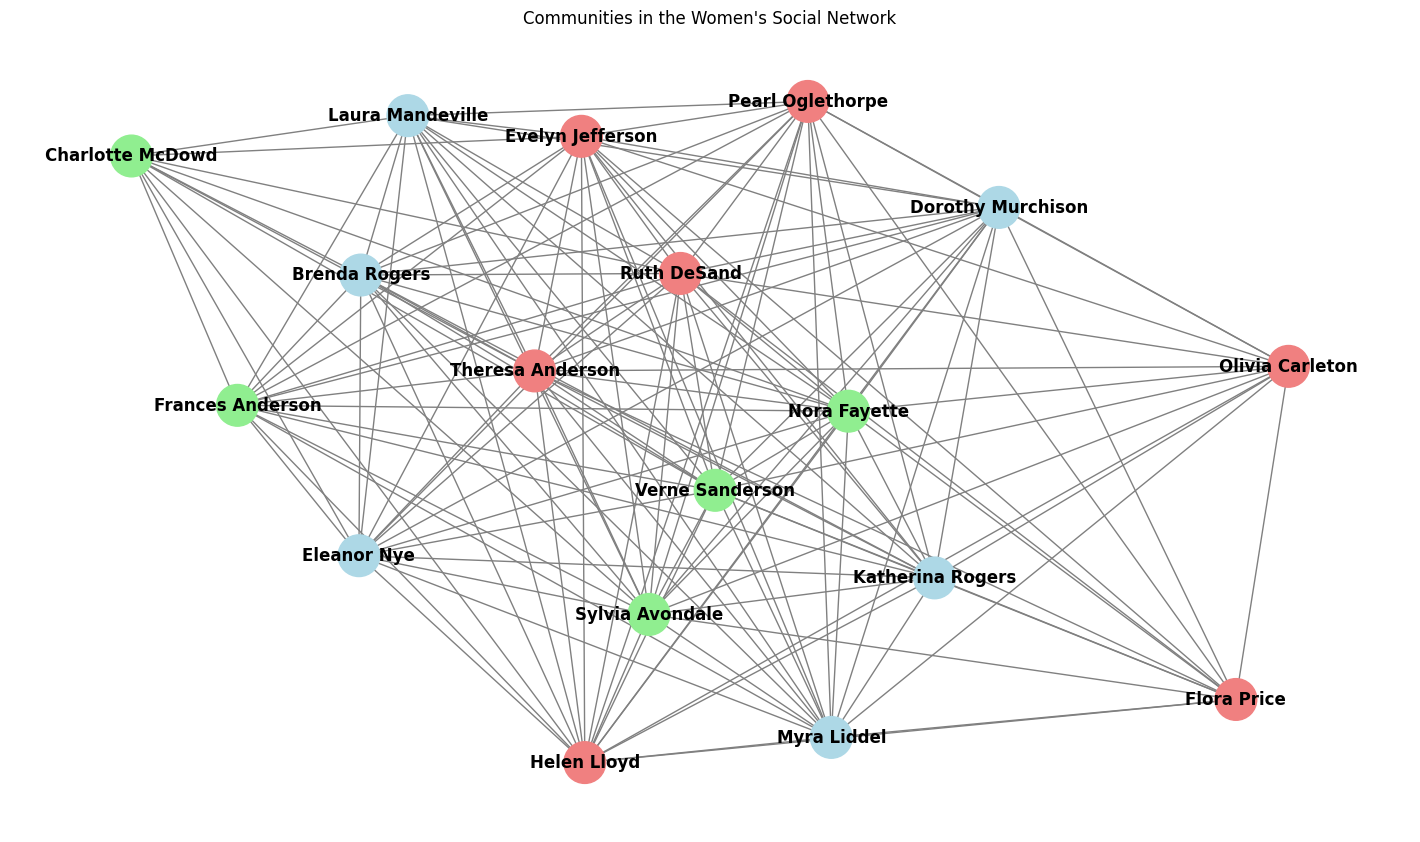

In [458]:
color_map = {}
colors = ['lightcoral', 'lightblue', 'lightgreen']
for i, comm in enumerate(communities):
    for node in comm:
        color_map[node] = colors[i % len(colors)]

node_colors = [color_map[n] for n in WW.nodes()]

plt.figure(figsize=(14, 8))
pos = nx.spring_layout(WW, seed=42)
nx.draw(WW, pos,
        with_labels=True,
        node_color=node_colors,
        edge_color='gray',
        node_size=900,
        font_weight='bold')
plt.title("Communities in the Women's Social Network")
plt.show()


Group 1, which includes women such as **Theresa Anderson**, **Evelyn Jefferson**, and **Ruth DeSand**, shows the highest level of connectivity and participation across several events. Within this group, **Theresa Anderson** has the highest betweenness centrality, indicating that she often connects members from different parts of the network and helps maintain overall cohesion.  

Group 2, represented by women like **Laura Mandeville**, **Brenda Rogers**, and **Eleanor Nye**, is moderately active and shows strong connections within the group but fewer ties outside of it.  

Group 3, which includes **Nora Fayette**, **Sylvia Avondale**, and **Frances Anderson**, is more peripheral and participates in fewer shared events, although both **Nora Fayette** and **Sylvia Avondale** show higher betweenness scores that suggest they occasionally link their group to the broader network.  
Overall, **Group 1** plays the most central and connecting role, while **Groups 2 and 3** form smaller, more focused circles with distinct levels of engagement.



In [459]:
w_cliques = list(nx.find_cliques(WW))
clique_data = [{ "Size": len(c),"Members": ", ".join(sorted(c))} for c in w_cliques]
clique_df = pd.DataFrame(clique_data).sort_values(by="Size", ascending=False)

clique_df.style.hide(axis="index")


Size,Members
15,"Brenda Rogers, Dorothy Murchison, Eleanor Nye, Evelyn Jefferson, Frances Anderson, Helen Lloyd, Katherina Rogers, Laura Mandeville, Myra Liddel, Nora Fayette, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson"
13,"Dorothy Murchison, Evelyn Jefferson, Flora Price, Helen Lloyd, Katherina Rogers, Myra Liddel, Nora Fayette, Olivia Carleton, Pearl Oglethorpe, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson"
12,"Brenda Rogers, Charlotte McDowd, Eleanor Nye, Evelyn Jefferson, Frances Anderson, Helen Lloyd, Laura Mandeville, Nora Fayette, Ruth DeSand, Sylvia Avondale, Theresa Anderson, Verne Sanderson"


The clique analysis shows that many women belong to large, overlapping groups where everyone is directly connected to everyone else.  
The **largest clique has 15 members**, which means 15 women each share event attendance with every other woman in that group.  
Two slightly smaller cliques of **13 and 12 members** overlap heavily with the largest one, showing that these groups are not separate but form part of the same densely connected core.  
This pattern confirms that the women’s network is highly cohesive, with strong redundancy in social ties — most participants are linked not just indirectly but through many direct, shared relationships.


In [460]:

articulation_points = list(nx.articulation_points(WW))
bridges = list(nx.bridges(WW))

connectivity_summary = pd.DataFrame({
    "Metric": ["Articulation Points", "Bridges"],
    "Count": [len(articulation_points), len(bridges)],
    "Details": [articulation_points if articulation_points else "None", 
                bridges if bridges else "None"]
})

connectivity_summary.style.hide(axis="index")


Metric,Count,Details
Articulation Points,0,None
Bridges,0,None


The articulation point and bridge analysis shows that the network remains fully connected even when individual nodes or links are removed. The absence of articulation points or bridges means that there are multiple paths between participants, confirming that the network is both cohesive and resilient. This structure supports earlier findings that interactions are broadly shared and not dependent on any single individual or connection.

In [506]:

core_numbers = nx.core_number(WW)
max_core = nx.k_core(WW)

kcore_df = pd.DataFrame(data=list(core_numbers.items()),columns= ["Person","Core"]).sort_values("Core",ascending=False)

matrix_df_event = (
    kcore_df
    .set_index('Person')     
    .T                      
    .rename_axis(None, axis=0)  
    .rename_axis('Person', axis=1) 
)

matrix_df_event.index = ['Core']
matrix_df_event


Person,Evelyn Jefferson,Laura Mandeville,Theresa Anderson,Brenda Rogers,Frances Anderson,Eleanor Nye,Ruth DeSand,Pearl Oglethorpe,Verne Sanderson,Myra Liddel,Helen Lloyd,Katherina Rogers,Sylvia Avondale,Nora Fayette,Dorothy Murchison,Olivia Carleton,Flora Price,Charlotte McDowd
Core,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,12,12,11


The k-core analysis shows that most women belong to a very tightly connected part of the network. A core number of 14 means that these women each share event attendance with at least 14 others who are also part of that same close group. Only a few women, such as **Charlotte McDowd**, **Olivia Carleton**, and **Flora Price**, have slightly lower core numbers, which means they are less connected within this dense core. Overall, this result confirms that the network is highly cohesive, with most participants forming one strong and active center of interaction rather than several small, separate groups.


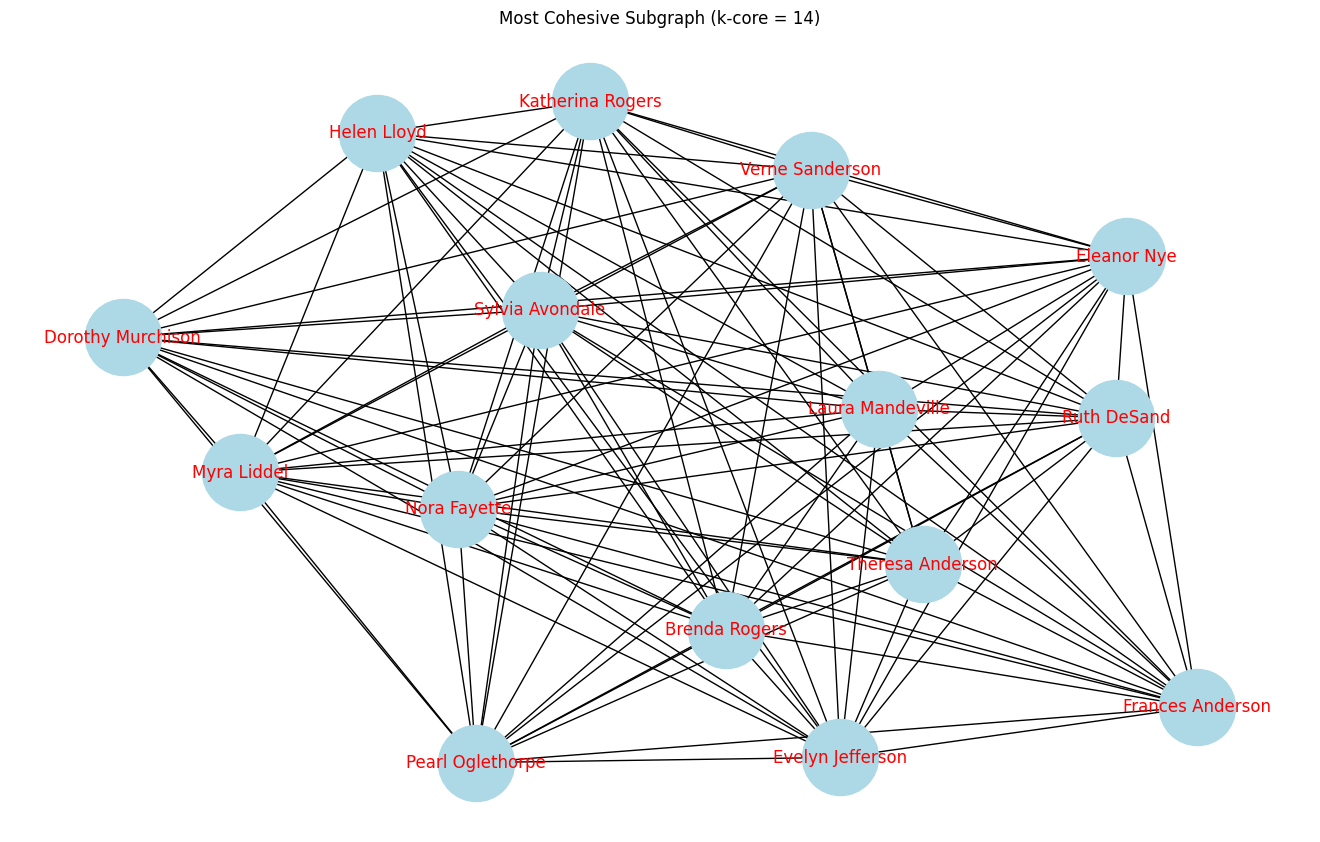

In [463]:
plt.figure(figsize=(13,8))
nx.draw(max_core, with_labels=True, node_color="lightblue", node_size=3000, font_size=12,font_color="red")
plt.title("Most Cohesive Subgraph (k-core = 14)")
plt.show()


## Events


In [464]:
club_weighted = bipartite.weighted_projected_graph(G, clubs)
club_unweighted = bipartite.projected_graph(G, clubs)

for u, v, d in club_weighted.edges(data=True):
    d["inv_weight"] = 1 / d["weight"]

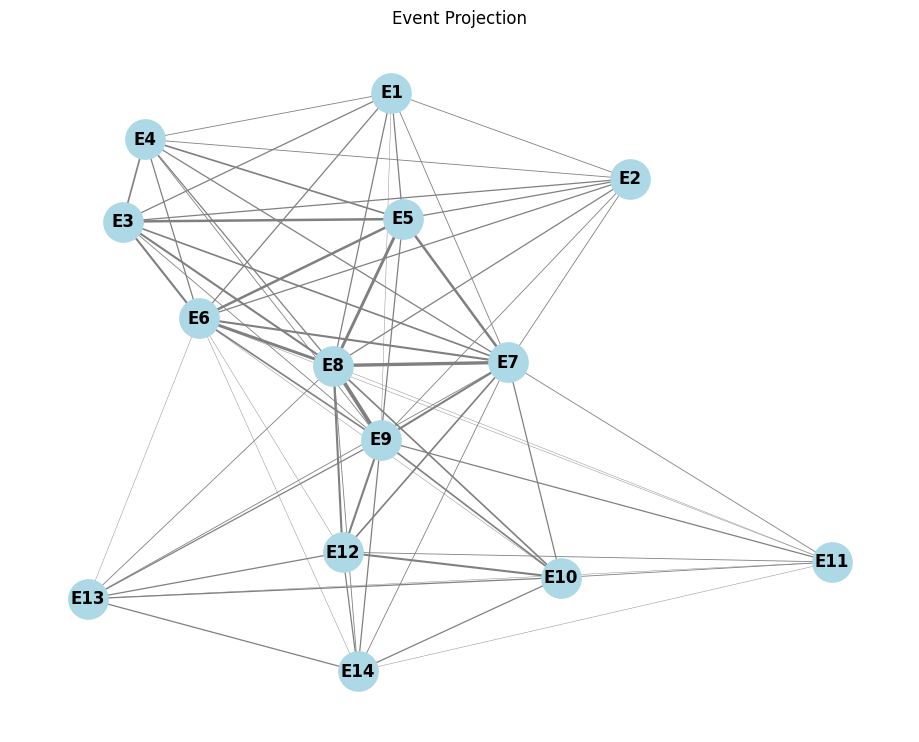

In [465]:
pos = nx.spring_layout(club_weighted, seed=42)
edge_weights = [club_weighted[u][v]["weight"] for u, v in club_weighted.edges()]

plt.figure(figsize=(9, 7))
nx.draw(
    club_weighted,
    pos,
    with_labels=True,
    node_color="lightblue",
    node_size=800,
    font_weight="bold",
    edge_color="gray",
    width=[w * 0.3 for w in edge_weights]
)
plt.title("Event Projection")
plt.show()

In [466]:
# Compute clustering and density metrics for the club projection
avg_clustering_club = nx.average_clustering(club_weighted)
avg_weighted_clustering_club = nx.average_clustering(club_weighted, weight="inv_weight")
club_density = nx.density(club_weighted)

# Create a summary DataFrame
clustering_metrics_club = pd.DataFrame(
    data=[[avg_clustering_club, avg_weighted_clustering_club, club_density]],
    columns=["Average Clustering", "Weighted Average Clustering", "Density"]
)

clustering_metrics_club.style.hide(axis="index")


Average Clustering,Weighted Average Clustering,Density
0.908425,0.345002,0.725275


The results show that most clubs are well connected, but the strength of those connections is not the same across the network. The **average clustering coefficient of 0.91** means that many clubs share participants with several others, forming close groups where members often attend multiple events together. When the strength of these shared connections is considered, the **weighted clustering coefficient drops to 0.35**, showing that some ties are much stronger than others. This means that while most clubs are linked, only a few share participants frequently. The **density of 0.73** supports this pattern, showing that the network is generally connected but not all clubs are linked with equal intensity. Overall, the club network shows broad participation with a few strong overlaps and many lighter connections between events.


In [467]:
# Unweighted metrics
degree_centrality = nx.degree_centrality(club_unweighted)
betweenness_centrality = nx.betweenness_centrality(club_unweighted)
eigen_centrality = nx.eigenvector_centrality(club_unweighted)

# Weighted metrics
weighted_degree = dict(club_weighted.degree(weight="weight"))
weighted_betweenness = nx.betweenness_centrality(club_weighted, weight="inv_weight")
weighted_eigen = nx.eigenvector_centrality(club_weighted, weight="weight")

In [468]:
club_degree_top = top_n_degrees(degree_centrality, 10)
club_betweenness_top = top_n_degrees(betweenness_centrality, 10)
club_eigen_top = top_n_degrees(eigen_centrality, 10)

display_side_by_side(
    [club_degree_top, club_betweenness_top, club_eigen_top],
    ["Degree Centrality", "Betweenness Centrality", "Eigenvector Centrality"]
)

Node,Degree,Degree_(%)
E6,1.000000,9.848485
E7,1.000000,9.848485
E8,1.000000,9.848485
E9,1.000000,9.848485
E2,0.615385,6.060606
E1,0.615385,6.060606
E5,0.615385,6.060606
E4,0.615385,6.060606
E3,0.615385,6.060606
E10,0.615385,6.060606


The unweighted centrality results show that a few clubs occupy a much more prominent structural position in the network. Clubs E6, E7, E8, and E9 have the highest degree, betweenness, and eigenvector centrality values, indicating that they are strongly interconnected and share attendees with almost every other club. These clubs likely represent the most active or socially central gatherings where participation overlaps extensively. The remaining clubs (E1–E5 and E10–E14) have lower scores across all measures, suggesting they attract smaller or more distinct groups of participants.

In [469]:
club_w_degree_top = top_n_degrees(weighted_degree, 10)
club_w_betweenness_top = top_n_degrees(weighted_betweenness, 10)
club_w_eigen_top = top_n_degrees(weighted_eigen, 10)

display_side_by_side(
    [club_w_degree_top, club_w_betweenness_top, club_w_eigen_top],
    ["Weighted Degree Centrality", "Weighted Betweenness Centrality", "Weighted Eigenvector Centrality"]
)


Node,Degree,Degree_(%)
E8,59,13.785047
E7,48,11.214953
E9,46,10.747664
E6,41,9.579439
E5,38,8.878505
E3,32,7.476636
E12,28,6.542056
E10,25,5.841121
E4,23,5.373832
E2,20,4.672897


The weighted results show clearer differences between clubs, helping to identify which ones attract the most shared participation. **Club E8** has the highest values across all metrics, meaning it shares the most attendees with other clubs, connects different parts of the network, and is linked to other popular gatherings. **Clubs E7, E9, and E6** also have high scores for degree and eigenvector centrality, showing they are part of the same core group of closely related events. The weighted betweenness results, however, reveal that only E8 and E9 serve as real bridges between different sets of clubs, while most others stay connected within their own circles.

In [ ]:
club_communities = community.greedy_modularity_communities(club_weighted, weight="weight")

club_community_data = []

for i, comm in enumerate(club_communities, start=1):
    club_community_data.append({
        "Community": f"Community {i}",
        "Members": ", ".join(sorted(comm)),
        "Size": len(comm)
    })

club_community_df = pd.DataFrame(club_community_data)

club_community_df.style.hide(axis="index")


Community,Members,Size
Community 1,"E1, E2, E3, E4, E5, E6, E7, E8",8
Community 2,"E10, E11, E12, E13, E14, E9",6


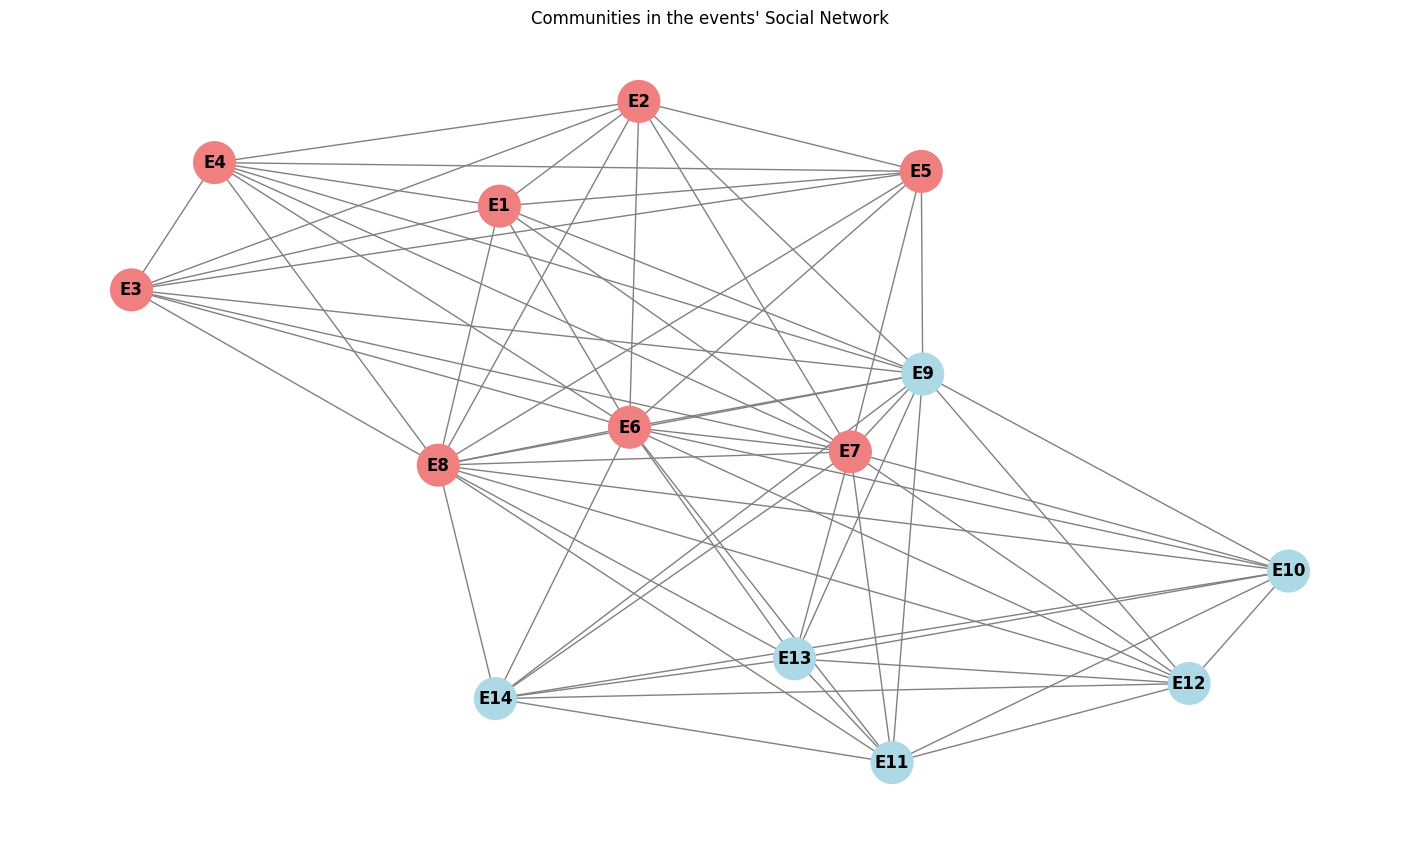

In [471]:
color_map_event = {}
colors = ['lightcoral', 'lightblue', 'lightgreen']
for i, comm in enumerate(club_communities):
    for node in comm:
        color_map_event[node] = colors[i % len(colors)]

node_colors_club = [color_map_event[n] for n in club_unweighted.nodes()]

plt.figure(figsize=(14, 8))
pos = nx.spring_layout(club_unweighted, seed=42)
nx.draw(club_unweighted, pos,
        with_labels=True,
        node_color=node_colors_club,
        edge_color='gray',
        node_size=900,
        font_weight='bold')
plt.title("Communities in the events' Social Network")
plt.show()

The community detection results show two main groups of clubs that attract different but overlapping sets of participants. **Community 1**, which includes clubs E1 through E8, represents the most interconnected group, where events tend to share many of the same attendees. Several of these clubs, such as **E6**, **E7**, and **E8**, are also among the most central according to the previous metrics, suggesting that this cluster forms the **core** of the social activity network. **Community 2**, made up of clubs **E9** through **E14**, appears more peripheral but still linked to the main group through shared participants, particularly via **Club E9**, which acts as a connector between both communities. Together, these results suggest that participation in social events is organized around one large and cohesive cluster of closely related clubs, with a smaller secondary group that interacts with it through a few key bridging events.

In [487]:
event_cliques = list(nx.find_cliques(club_weighted))
event_clique_data = [{"Size": len(c), "Members": ", ".join(sorted(c))} for c in event_cliques]
event_clique_df = pd.DataFrame(event_clique_data).sort_values(by="Size", ascending=False)
event_clique_df.style.hide(axis="index")





Size,Members
9,"E10, E11, E12, E13, E14, E6, E7, E8, E9"
9,"E1, E2, E3, E4, E5, E6, E7, E8, E9"


The clique analysis shows that there are two large, fully connected groups of clubs. Each clique contains nine events, and they overlap through **Clubs E6 to E9**, which appear in both groups. This pattern suggests that these clubs share many of the same participants and serve as strong links between the two main clusters of events.

In [510]:
event_articulation_points = list(nx.articulation_points(club_weighted))
event_bridges = list(nx.bridges(club_weighted))

event_connectivity_summary = pd.DataFrame({
    "Metric": ["Articulation Points", "Bridges"],
    "Count": [len(event_articulation_points), len(event_bridges)],
    "Details": [event_articulation_points if event_articulation_points else "None",
                event_bridges if event_bridges else "None"]
})

event_connectivity_summary.style.hide(axis="index")



Metric,Count,Details
Articulation Points,0,None
Bridges,0,None


 The lack of articulation points or bridges means that no single club or connection is critical to keeping the network connected. Even if one event or link were removed, the rest of the network would remain fully joined. Overall, the event network shows high cohesion and redundancy, with multiple overlapping connections ensuring its stability.


In [495]:
event_core_numbers = nx.core_number(club_weighted)
event_max_core = nx.k_core(club_weighted)

event_kcore_df = (
    pd.DataFrame(data=list(event_core_numbers.items()), columns=["Event", "Core"])
    .sort_values("Core", ascending=False)

)

In [499]:
matrix_df_event = (
    event_kcore_df
    .set_index('Event')     
    .T                      
    .rename_axis(None, axis=0)  
    .rename_axis('Event', axis=1) 
)

matrix_df_event.index = ['Core']
matrix_df_event


Event,E1,E2,E3,E4,E5,E6,E7,E8,E9,E10,E11,E12,E13,E14
Core,8,8,8,8,8,8,8,8,8,8,8,8,8,8


The k-core analysis shows that all events belong to the same highest-order core, where each club is connected to at least eight others within this inner structure. This means that the event network is uniformly dense, with no peripheral or weakly linked clubs. Every event contributes to the same cohesive core, confirming that participation patterns are evenly distributed across the network. Combined with the absence of articulation points or bridges and the presence of large overlapping cliques, this result shows a highly stable and resilient event network where all gatherings are strongly connected through shared participants.

## Conclusion

The analysis of the Davis Southern Women network shows that the group was very cohesive and well connected. The data link 18 women and 14 events through shared attendance, forming a dense web of relationships. In the unweighted results, almost every woman was connected, with an average clustering coefficient of **0.94** and a density of **0.91**. This means that if two women attended an event with a third, they were very likely connected as well. **Evelyn Jefferson**, **Theresa Anderson**, **Sylvia Avondale**, and **Ruth DeSand** attended the most events and had the highest centrality values, while **Myra Liddel** and **Laura Mandeville** also participated actively but had slightly fewer connections. Influence was shared across many members, showing a balanced and inclusive social setting.

When the strength of connections was considered, the weighted clustering coefficient dropped to **0.49**, which suggests that while the network remained dense, not all relationships were equally strong. The same women stayed central, but **Theresa Anderson** and **Nora Fayette** became especially important as they linked different parts of the network. The weighted results showed that a few participants maintained stronger and more frequent ties that helped keep the network connected.

The community analysis identified **three main groups**.  
- **Group 1:** Included Theresa Anderson, Evelyn Jefferson, and Ruth DeSand. This was the most active and central group.  
- **Group 2:** Contained women such as Laura Mandeville and Brenda Rogers, who had strong internal links but fewer ties to others.  
- **Group 3:** Included Nora Fayette and Sylvia Avondale, who were smaller and more peripheral but sometimes acted as connectors.  

The absence of articulation points and bridges showed that no single woman was essential for the network’s stability. The **k-core result** confirmed that most women belonged to a tightly connected inner group of **14 members**, with only a few being less connected.

The **event network** showed a similar pattern. **Clubs E6, E7, E8, and E9** were the most central and shared attendees with nearly all other clubs. The weighted results highlighted **E8** and **E9** as the main bridges connecting two event communities: one containing **Clubs E1–E8** and the other **E9–E14**. The large overlapping cliques and the lack of articulation points or bridges showed that the network of events was stable and evenly connected, with every event linked to at least eight others.

Overall, both the women’s and event networks were **cohesive, stable, and resilient**. The unweighted results showed broad participation, while the weighted results revealed that a few individuals and events, such as **Theresa Anderson**, **Nora Fayette**, and **Clubs E8 and E9**, played key roles in keeping the network united. These findings describe a community where participation was widespread, supported by a small core of highly active members and gatherings that helped maintain strong connections throughout the group.

